In [2]:
# Dependencies
import tweepy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
from config import (twitter_consumer_key, twitter_consumer_secret, twitter_access_token, twitter_access_token_secret)

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(twitter_consumer_key, twitter_consumer_secret)
auth.set_access_token(twitter_access_token, twitter_access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [17]:
# Target User Accounts
target_user = ("@BBC", "@CBS")#, "@CNN", "@FoxNews", "@NYTimes")

# List for dictionaries of results
results_list = []

# Loop through each user
for user in target_user:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []

    # Counter
    counter = 1

    # Variables for holding sentiments
    sentiments = []

    # Variable for max_id
    oldest_tweet = None

    # Loop through 5 pages of tweets (total 100 tweets)
    for x in range(2):#5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(user, max_id = oldest_tweet)

        # Loop through all tweets 
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            results = analyzer.polarity_scores(tweet["text"])
            compound = results["compound"]
            pos = results["pos"]
            neu = results["neu"]
            neg = results["neg"]
            tweets_ago = counter

            # Get Tweet ID, subtract 1, and assign to oldest_tweet
            oldest_tweet = tweet['id'] - 1

            # Add sentiments for each tweet into a list
            sentiments.append({"Username": user,
                               "Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neg,
                               "Neutral": neu,
                               "Tweets Ago": counter})

            # Add to counter 
            counter += 1
            
    # Append dictionary to list
    results_list.append(sentiments)

In [19]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(results_list)#.set_index("Username").round(3)
sentiments_pd.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,"{'Username': '@BBC', 'Date': 'Sun Apr 01 20:38...","{'Username': '@BBC', 'Date': 'Sun Apr 01 19:00...","{'Username': '@BBC', 'Date': 'Sun Apr 01 18:00...","{'Username': '@BBC', 'Date': 'Sun Apr 01 17:42...","{'Username': '@BBC', 'Date': 'Sun Apr 01 17:00...","{'Username': '@BBC', 'Date': 'Sun Apr 01 16:03...","{'Username': '@BBC', 'Date': 'Sun Apr 01 15:00...","{'Username': '@BBC', 'Date': 'Sun Apr 01 14:48...","{'Username': '@BBC', 'Date': 'Sun Apr 01 14:47...","{'Username': '@BBC', 'Date': 'Sun Apr 01 12:19...",...,"{'Username': '@BBC', 'Date': 'Wed Mar 28 11:50...","{'Username': '@BBC', 'Date': 'Wed Mar 28 11:49...","{'Username': '@BBC', 'Date': 'Wed Mar 28 11:47...","{'Username': '@BBC', 'Date': 'Wed Mar 28 11:47...","{'Username': '@BBC', 'Date': 'Wed Mar 28 11:45...","{'Username': '@BBC', 'Date': 'Wed Mar 28 11:42...","{'Username': '@BBC', 'Date': 'Wed Mar 28 11:30...","{'Username': '@BBC', 'Date': 'Wed Mar 28 11:04...","{'Username': '@BBC', 'Date': 'Wed Mar 28 10:53...","{'Username': '@BBC', 'Date': 'Wed Mar 28 10:33..."
1,"{'Username': '@CBS', 'Date': 'Sun Apr 01 17:00...","{'Username': '@CBS', 'Date': 'Sat Mar 31 18:00...","{'Username': '@CBS', 'Date': 'Sat Mar 31 15:30...","{'Username': '@CBS', 'Date': 'Fri Mar 30 16:50...","{'Username': '@CBS', 'Date': 'Thu Mar 29 17:32...","{'Username': '@CBS', 'Date': 'Thu Mar 29 17:30...","{'Username': '@CBS', 'Date': 'Tue Mar 27 21:00...","{'Username': '@CBS', 'Date': 'Tue Mar 27 17:00...","{'Username': '@CBS', 'Date': 'Mon Mar 26 22:14...","{'Username': '@CBS', 'Date': 'Mon Mar 26 20:42...",...,"{'Username': '@CBS', 'Date': 'Sun Feb 25 21:51...","{'Username': '@CBS', 'Date': 'Fri Feb 23 18:15...","{'Username': '@CBS', 'Date': 'Thu Feb 22 19:26...","{'Username': '@CBS', 'Date': 'Wed Feb 21 19:20...","{'Username': '@CBS', 'Date': 'Wed Feb 21 18:19...","{'Username': '@CBS', 'Date': 'Tue Feb 20 19:55...","{'Username': '@CBS', 'Date': 'Tue Feb 20 17:58...","{'Username': '@CBS', 'Date': 'Tue Feb 20 17:39...","{'Username': '@CBS', 'Date': 'Sat Feb 17 01:07...","{'Username': '@CBS', 'Date': 'Fri Feb 16 18:42..."
2,"{'Username': '@CNN', 'Date': 'Mon Apr 02 00:45...","{'Username': '@CNN', 'Date': 'Mon Apr 02 00:44...","{'Username': '@CNN', 'Date': 'Mon Apr 02 00:30...","{'Username': '@CNN', 'Date': 'Mon Apr 02 00:28...","{'Username': '@CNN', 'Date': 'Mon Apr 02 00:15...","{'Username': '@CNN', 'Date': 'Mon Apr 02 00:08...","{'Username': '@CNN', 'Date': 'Mon Apr 02 00:00...","{'Username': '@CNN', 'Date': 'Sun Apr 01 23:55...","{'Username': '@CNN', 'Date': 'Sun Apr 01 23:45...","{'Username': '@CNN', 'Date': 'Sun Apr 01 23:45...",...,"{'Username': '@CNN', 'Date': 'Sat Mar 31 20:15...","{'Username': '@CNN', 'Date': 'Sat Mar 31 20:00...","{'Username': '@CNN', 'Date': 'Sat Mar 31 19:45...","{'Username': '@CNN', 'Date': 'Sat Mar 31 19:30...","{'Username': '@CNN', 'Date': 'Sat Mar 31 19:15...","{'Username': '@CNN', 'Date': 'Sat Mar 31 19:00...","{'Username': '@CNN', 'Date': 'Sat Mar 31 18:45...","{'Username': '@CNN', 'Date': 'Sat Mar 31 18:30...","{'Username': '@CNN', 'Date': 'Sat Mar 31 18:15...","{'Username': '@CNN', 'Date': 'Sat Mar 31 18:00..."
3,"{'Username': '@FoxNews', 'Date': 'Mon Apr 02 0...","{'Username': '@FoxNews', 'Date': 'Mon Apr 02 0...","{'Username': '@FoxNews', 'Date': 'Mon Apr 02 0...","{'Username': '@FoxNews', 'Date': 'Mon Apr 02 0...","{'Username': '@FoxNews', 'Date': 'Mon Apr 02 0...","{'Username': '@FoxNews', 'Date': 'Mon Apr 02 0...","{'Username': '@FoxNews', 'Date': 'Mon Apr 02 0...","{'Username': '@FoxNews', 'Date': 'Mon Apr 02 0...","{'Username': '@FoxNews', 'Date': 'Mon Apr 02 0...","{'Username': '@FoxNews', 'Date': 'Sun Apr 01 2...",...,"{'Username': '@FoxNews', 'Date': 'Sun Apr 01 1...","{'Username': '@FoxNews', 'Date': 'Sun Apr 01 1...","{'Username': '@FoxNews', 'Date': 'Sun Apr 01 1...","{'Username': '@FoxNews', 'Date': 'Sun Apr 01 1...","{'Username': '@FoxNews', 'Date': 'Sun Apr 01 1...","{'Username': '@FoxNe

In [14]:
sentiments_pd.shape

(100, 6)

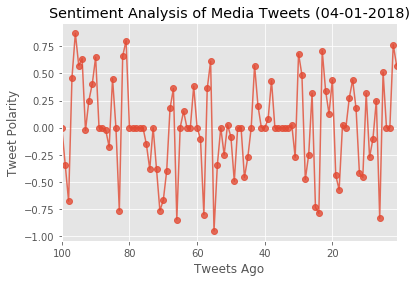

In [16]:
# Create plot
x_vals = sentiments_pd["Tweets Ago"]
y_vals = sentiments_pd["Compound"]
plt.plot(x_vals, y_vals, marker="o", alpha=0.8)

# # Incorporate the other graph properties
now = datetime.now()
now = now.strftime("%m-%d-%Y")
plt.title(f"Sentiment Analysis of Media Tweets ({now})")
plt.xlim([x_vals.max(),x_vals.min()])
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.show()

In [ ]:
plt.scatter(sentiments_df['lat'], hot_cities, marker="o", facecolors='red', edgecolors="black", alpha=1)
plt.scatter(sentiments_df['lat'], warm_cities, marker="o", facecolors='orange', edgecolors="black", alpha=1)
plt.scatter(sentiments_df['lat'], cool_cities, marker="o", facecolors='lightblue', edgecolors="black", alpha=1)
plt.scatter(sentiments_df['lat'], cold_cities, marker="o", facecolors='darkblue', edgecolors="black", alpha=1)
plt.scatter(sentiments_df['lat'], cold_cities, marker="o", facecolors='darkblue', edgecolors="black", alpha=1)